In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
path = '/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana_13/result.csv'
data  = pd.read_csv(path)

In [3]:
obj = np.zeros_like(data['type'])

In [4]:
obj[data['type'] == 'PSF'] = 1
obj[data['type'] == 'REX'] = 2
obj[data['type'] == 'DEV'] = 3
obj[data['type'] == 'EXP'] = 4
obj[data['type'] == 'COMP'] = 5

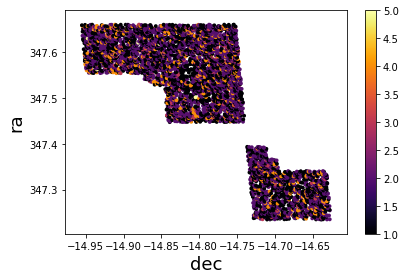

In [5]:
plt.scatter(data.dec, data.ra, label=None,
            c = obj, s = 15, cmap='inferno', linewidth=0, alpha=1)
plt.xlabel('dec',fontsize=18)
plt.ylabel('ra',fontsize=18)
plt.colorbar();
plt.tight_layout()
plt.show()

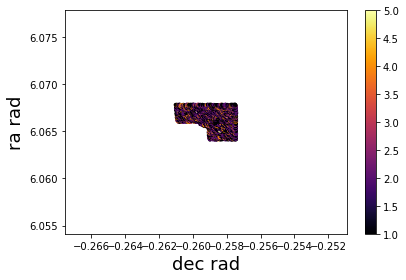

In [6]:
dec = data.dec[data.dec < -14.75]*(np.pi/180)
ra = data.ra[data.dec < -14.75]*(np.pi/180)

plt.scatter(dec, ra, label=None,
            c = obj[data.dec < -14.75], s = 15, cmap='inferno', linewidth=0, alpha=1)
plt.xlabel('dec rad',fontsize=18)
plt.ylabel('ra rad',fontsize=18)
plt.colorbar();
plt.tight_layout()
plt.show()

In [7]:
xdata = np.cos(ra)*np.sin(dec)
ydata = np.sin(ra)*np.sin(dec)
zdata = np.cos(dec)

In [8]:
U = np.random.uniform(np.cos(np.min(dec)),np.cos(np.max(dec)),len(dec))
ra_rand = np.random.uniform(np.min(ra),np.max(ra),len(ra))

In [9]:
x_rand = -np.cos(ra_rand)*(1-U**2)**0.5
y_rand = -np.sin(ra_rand)*(1-U**2)**0.5
z_rand = U

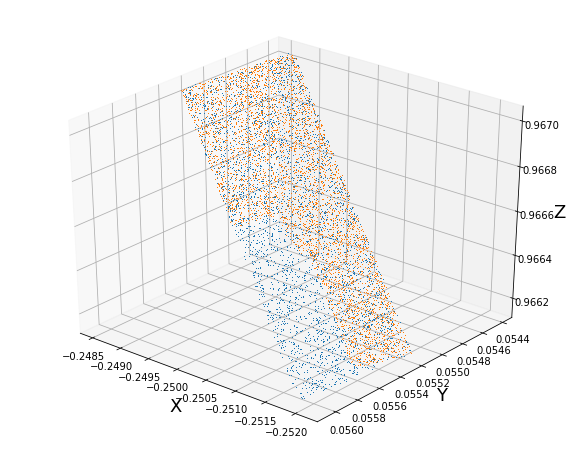

In [10]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(x_rand,y_rand,z_rand,',')
ax.plot3D(xdata,ydata,zdata,',')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
ax.view_init(30, 130)
plt.show()

DELIMITAMOS DATOS:

In [11]:
n = 3000
x = xdata[:n]
y = ydata[:n]
z = zdata[:n]

GENERAMOS PUNTOS ALEATORIOS:

In [16]:
U = np.random.uniform(np.cos(np.min(dec[:n])),np.cos(np.max(dec[:n])),3*n)
ra_rand = np.random.uniform(np.min(ra[:n]),np.max(ra[:n]),3*n)

x_r = -np.cos(ra_rand)*(1-U**2)**0.5
y_r = -np.sin(ra_rand)*(1-U**2)**0.5
z_r = U

GRAFICAMOS:

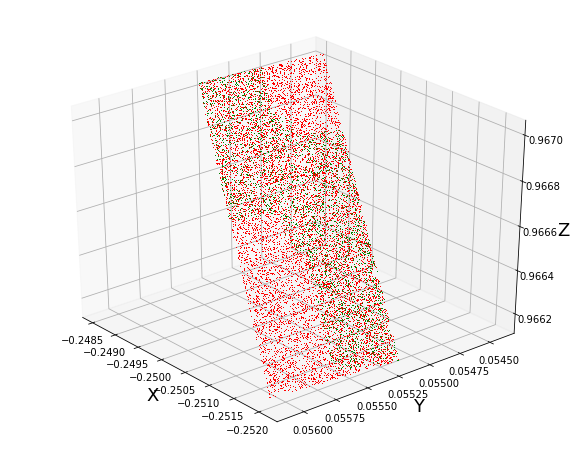

In [17]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z,',g')
ax.plot3D(x_r,y_r,z_r,',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
ax.view_init(30, 140)
plt.show()

ACOMODAMOS LOS DATOS EN UN MEJOR ARREGLO

In [18]:
X = np.array([x,y,z]).T
X_r = np.array([x_r,y_r,z_r]).T

In [19]:
#FUNCIÓN PARA CALCULAR DISTANCIAS ENTRE EL MISMO ARREGLO
def dis_prop(x):
    dis = []
    n = 0
    for ii in x:
        M = np.linalg.norm(ii-x[n:],axis=1)
        dis.extend(M[M!=0])
        n = n+1
    return np.array(dis)

In [20]:
#FUNCIÓN PARA CALCULAR DISTANCIAS ENTRE ARREGLOS DIFERENTES
def dis_DR(x,y):
    dis = []
    for ii in x:
        M = np.linalg.norm(ii-y,axis=1)
        dis.extend(M)
    return np.array(dis)

In [21]:
#FUNCIÓN DE CORRELACIÓN Peebles-Hauser
def correl_PH(p,p_r,bn):
    
    DD = dis_prop(p)
    nD = len(DD)
    RR = dis_prop(p_r)
    nR = len(RR)
    
    rD = np.linspace(0,np.max(DD),bn)
    rR = np.linspace(0,np.max(RR),bn)
    
    eps = []
    
    for i in range(bn-1):
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        eps.append((nR*NDD/(nD*NRR))-1)
        
    return rD[:bn-1],np.array(eps)

In [22]:
#FUNCIÓN DE CORRELACIÓN Landy-Szalay
def correl_LS(p,p_r,bn):
    
    DD = dis_prop(p)
    nD = len(DD)
    RR = dis_prop(p_r)
    nR = len(RR)
    DR = dis_DR(p,p_r)
    nDR = len(DR)
    
    rD = np.linspace(0,np.max(DD),bn)
    rR = np.linspace(0,np.max(RR),bn)
    rDR = np.linspace(0,np.max(DR),bn)
    
    eps = []
    
    for i in range(bn-1):
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        eps.append(1 + NDD*nR/(nD*NRR) - 2*NDR*nR/(nDR*NRR))
        
    return rD[:bn-1],np.array(eps)

In [23]:
bins = 100
r_PH,eps_PH = correl_PH(X,X_r,bins)

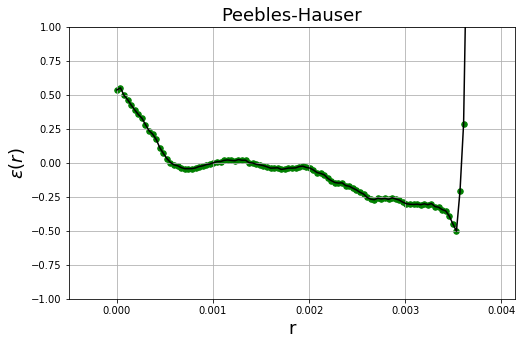

In [26]:
fig = plt.figure(figsize=(8,5))
plt.scatter(r_PH,eps_PH, s=30, c='g')
plt.plot(r_PH,eps_PH,'k-')
plt.xlim(np.min(r_PH)-0.0005,np.max(r_PH)+0.0005)
plt.ylim(-1,1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.title('Peebles-Hauser',fontsize=18)
plt.grid();

In [27]:
r_LS,eps_LS = correl_LS(X,X_r,bins)

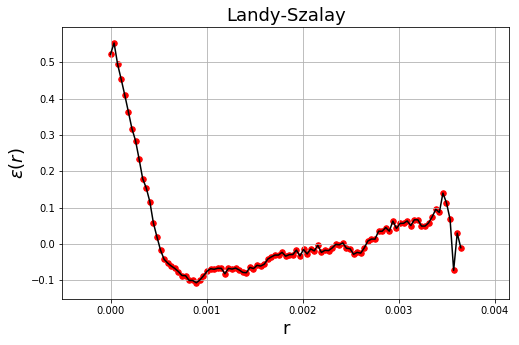

In [28]:
fig = plt.figure(figsize=(8,5))
plt.scatter(r_LS,eps_LS, s=30, c='r')
plt.plot(r_LS,eps_LS,'k-')
plt.xlim(np.min(r_LS)-0.0005,np.max(r_LS)+0.0005)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.title('Landy-Szalay',fontsize=18)
plt.grid();

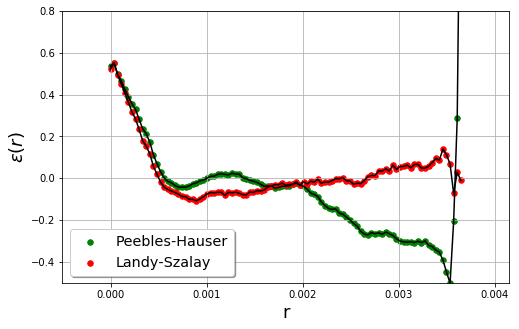

In [33]:
fig = plt.figure(figsize=(8,5))
plt.scatter(r_PH,eps_PH, s=30, c='g',label='Peebles-Hauser')
plt.scatter(r_LS,eps_LS, s=30, c='r',label='Landy-Szalay')
plt.plot(r_LS,eps_LS,'k-')
plt.plot(r_PH,eps_PH,'k-')
plt.xlim(np.min(r_LS)-0.0005,np.max(r_LS)+0.0005)
plt.ylim(-0.5,0.8)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();